# Forecasting Cryptocurrency Prices: A Comprehensive Analysis Using Daily Data

![Crypto](https://jeangalea.com/wp-content/uploads/2021/04/Tokenized-stocks-800x540.png)

## Introduction

### Predicting Cryptocurrency Prices

Cryptocurrencies have become a prominent asset class in the financial markets, characterized by their significant price fluctuations and complex behavior. Accurate prediction of cryptocurrency prices can provide substantial advantages for traders, investors, and analysts. This project focuses on forecasting the daily prices of cryptocurrencies using a dataset from Kaggle, which includes historical daily prices of various cryptocurrencies.

### Project Objectives

1. **Data Collection:** Utilize the "Cryptocurrencies Daily Prices" dataset from Kaggle, which contains daily price information for multiple cryptocurrencies. This dataset includes key features such as opening, closing, high, and low prices, as well as trading volume.
2. **Data Preprocessing:** Prepare the dataset by handling missing values, normalizing features, and creating relevant new features. This step will ensure that the data is in the optimal format for analysis and modeling.
3. **Exploratory Data Analysis (EDA):** Conduct an in-depth analysis to uncover trends, patterns, and correlations within the data. Visualization and statistical analysis will help in understanding the behavior of different cryptocurrencies over time.
4. **Model Development:** Implement and evaluate various predictive models, including time series forecasting methods (e.g., ARIMA, Prophet) and machine learning algorithms (e.g., Linear Regression, Random Forest, Gradient Boosting). The goal is to identify the most effective approach for forecasting daily cryptocurrency prices.
5. **Model Evaluation:** Assess the performance of the predictive models using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). This evaluation will help in selecting the best-performing model.
6. **Deployment and Analysis:** Prepare the final model for potential real-world application, and provide insights and recommendations based on the predictions. This may involve developing a simple API or integrating the model into a trading strategy.

### Scope and Goals

The scope of this project involves:
- Analyzing daily price data for a selection of cryptocurrencies from the Kaggle dataset.
- Applying data preprocessing techniques and feature engineering to enhance model performance.
- Comparing various models to determine the most accurate forecasting method.
- Presenting actionable insights and potential use cases for the model's predictions.

This notebook will guide you through the entire process, from initial data exploration to the final model evaluation, with the aim of building a robust forecasting system for cryptocurrency prices.

## Steps of the Project

### 1. **Data Collection**
   **Description:** Acquire the dataset containing historical daily prices for various cryptocurrencies. This dataset includes key features such as opening, closing, high, and low prices, as well as trading volumes. The data can be sourced from Kaggle or other financial data providers.

### 2. **Data Preprocessing**
   **Description:** Prepare the data for analysis by cleaning and transforming it. This includes handling missing values, normalizing numerical features, and encoding categorical variables. Preprocessing also involves feature engineering to create new features that may improve model performance.

### 3. **Exploratory Data Analysis (EDA)**
   **Description:** Analyze the data to understand its structure and underlying patterns. This involves visualizing price trends, calculating summary statistics, and exploring relationships between different features. EDA helps in identifying trends, anomalies, and correlations that can inform model selection.

### 4. **Feature Engineering**
   **Description:** Develop new features from the existing data to enhance model performance. This might include calculating moving averages, volatility measures, or other technical indicators relevant to cryptocurrency trading. Feature engineering aims to provide the model with additional insights into price behavior.

### 5. **Model Selection**
   **Description:** Choose and implement various predictive models suitable for time series forecasting. Models may include statistical methods like ARIMA and SARIMA, or machine learning approaches such as Linear Regression, Random Forests, and Gradient Boosting. Each model will be evaluated to determine its suitability for predicting cryptocurrency prices.

### 6. **Model Training**
   **Description:** Train the selected models on the training data. This involves fitting the models to the historical price data and optimizing their parameters. Hyperparameter tuning and cross-validation are used to improve the models’ accuracy and generalization.

### 7. **Model Evaluation**
   **Description:** Assess the performance of the trained models using the testing data. Evaluate the models based on metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). This step helps in selecting the best-performing model.

### 8. **Model Improvement**
   **Description:** Refine and enhance the model based on evaluation results. This may involve feature selection, model tuning, or trying different algorithms. The goal is to improve prediction accuracy and ensure robustness.

### 9. **Deployment**
   **Description:** Prepare the final model for real-world application. This might involve developing an API or integrating the model into a web or mobile application. Deployment also includes setting up a system for continuous monitoring and updating of the model.

## 0. Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

## 1. **Data Loading and Preparation:**

In [2]:
btc_data = pd.read_csv('../Dataset/BTC.csv')
ltc_data = pd.read_csv('../Dataset/LTC.csv')
eth_data = pd.read_csv('../Dataset/ETH.csv')

In [3]:
df = pd.concat([btc_data, ltc_data, eth_data], ignore_index=True)

In [4]:
btc_df = pd.DataFrame(btc_data)
ltc_df = pd.DataFrame(ltc_data)
eth_df = pd.DataFrame(eth_data)

In [5]:
crypto_data = pd.DataFrame(df)

In [6]:
crypto_data.head(5)

,ticker,date,open,high,low,close
0,BTC,2010-07-17,0.04951,0.04951,0.04951,0.04951
1,BTC,2010-07-18,0.04951,0.08585,0.04951,0.08584
2,BTC,2010-07-19,0.08584,0.09307,0.07723,0.08080
3,BTC,2010-07-20,0.08080,0.08181,0.07426,0.07474
4,BTC,2010-07-21,0.07474,0.07921,0.06634,0.07921


In [7]:
crypto_data.shape

(12361, 6)

## 2. Data Preprocessing

### 2.1 Checking for different Crypto Currencies in the dataset

In [8]:
crypto_data['ticker'].value_counts()

ticker
BTC    5135
LTC    3938
ETH    3288
Name: count, dtype: int64

So there are total 128 types of cryptocurrencies. and we should check and clean each one of them for a proper cleaned and preprocessed data.

In [9]:
crypto_data.isna().sum()

ticker    0
date      0
open      0
high      0
low       0
close     0
dtype: int64

So there is 0 null or na values in the dataset.

In [10]:
crypto_data.duplicated().sum()

0

Also there is not even a single duplicated row in the dataset

In [11]:
print(crypto_data.dtypes)

ticker     object
date       object
open      float64
high      float64
low       float64
close     float64
dtype: object


### 2.2 Let's first explore the Bitcoin dataset

In [12]:
btc_df

,ticker,date,open,high,low,close
0,BTC,2010-07-17,0.04951,0.04951,0.04951,0.04951
1,BTC,2010-07-18,0.04951,0.08585,0.04951,0.08584
2,BTC,2010-07-19,0.08584,0.09307,0.07723,0.08080
3,BTC,2010-07-20,0.08080,0.08181,0.07426,0.07474
4,BTC,2010-07-21,0.07474,0.07921,0.06634,0.07921
...,...,...,...,...,...,...
5130,BTC,2024-08-02,64835.80000,65558.90000,61234.40000,61915.70000
5131,BTC,2024-08-03,61922.70000,62177.00000,59843.10000,60605.30000
5132,BTC,2024-08-04,60609.80000,61075.20000,57164.50000,58443.00000
5133,BTC,2024-08-05,58443.00000,59100.90000,48999.50000,54375.70000


**Let's explore the correlation map of the BTC dataset first.**

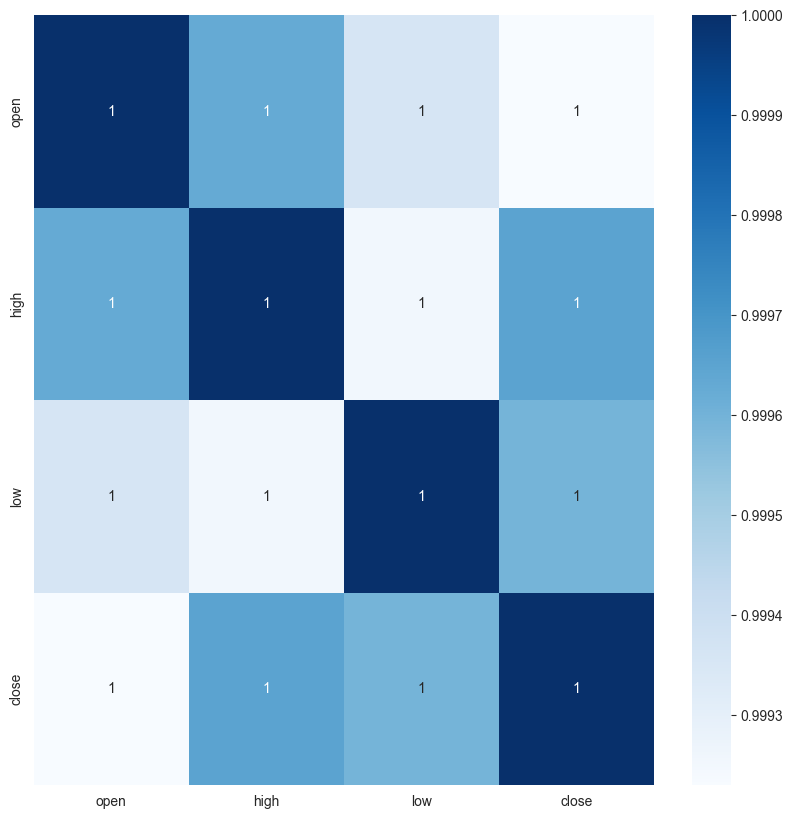

In [13]:
btc_corr = btc_df.corr(numeric_only=True)

plt.figure(figsize=(10,10))
sns.heatmap(btc_corr, annot=True, cmap='Blues')
plt.show()

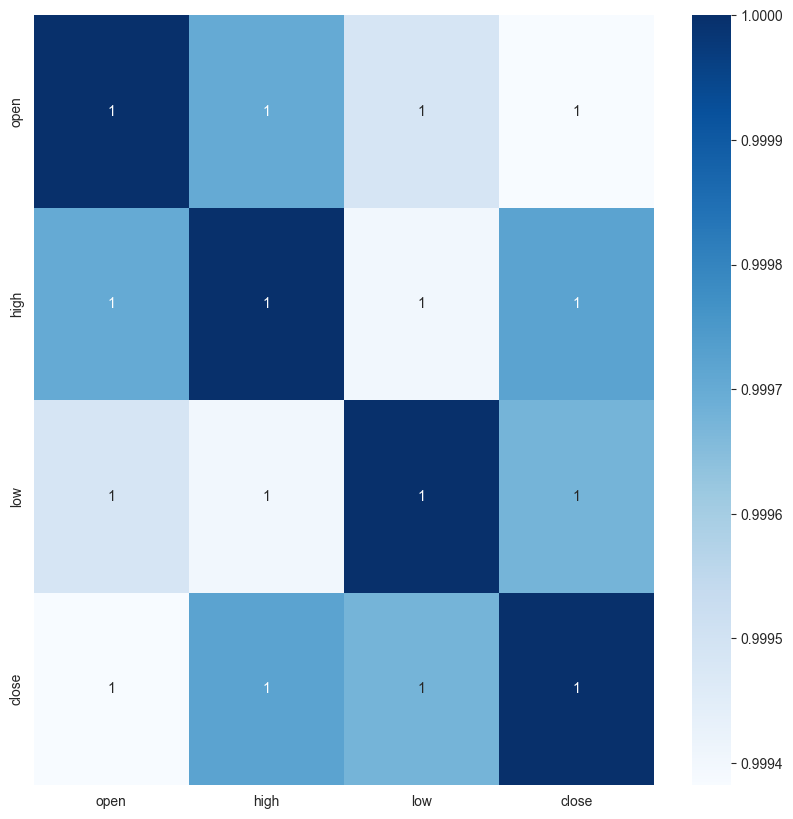

In [14]:
crypto_corr = crypto_data.corr(numeric_only=True)

plt.figure(figsize=(10,10))
sns.heatmap(crypto_corr, annot=True, cmap='Blues')
plt.show()

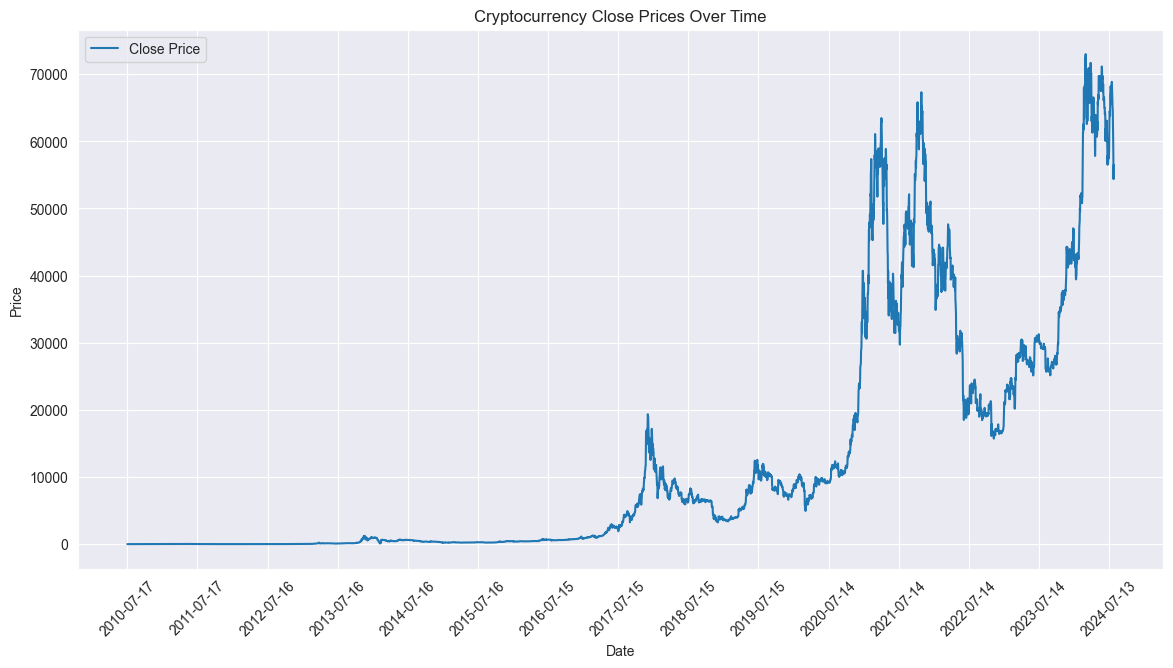

In [15]:
plt.figure(figsize=(14, 7))
plt.plot(btc_df['date'], btc_df['close'], label='Close Price')
plt.xticks(ticks=btc_df['date'][::365], rotation=45)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Cryptocurrency Close Prices Over Time')
plt.legend()
plt.show()

In [16]:
crypto_data['date'] = pd.to_datetime(crypto_data['date'])

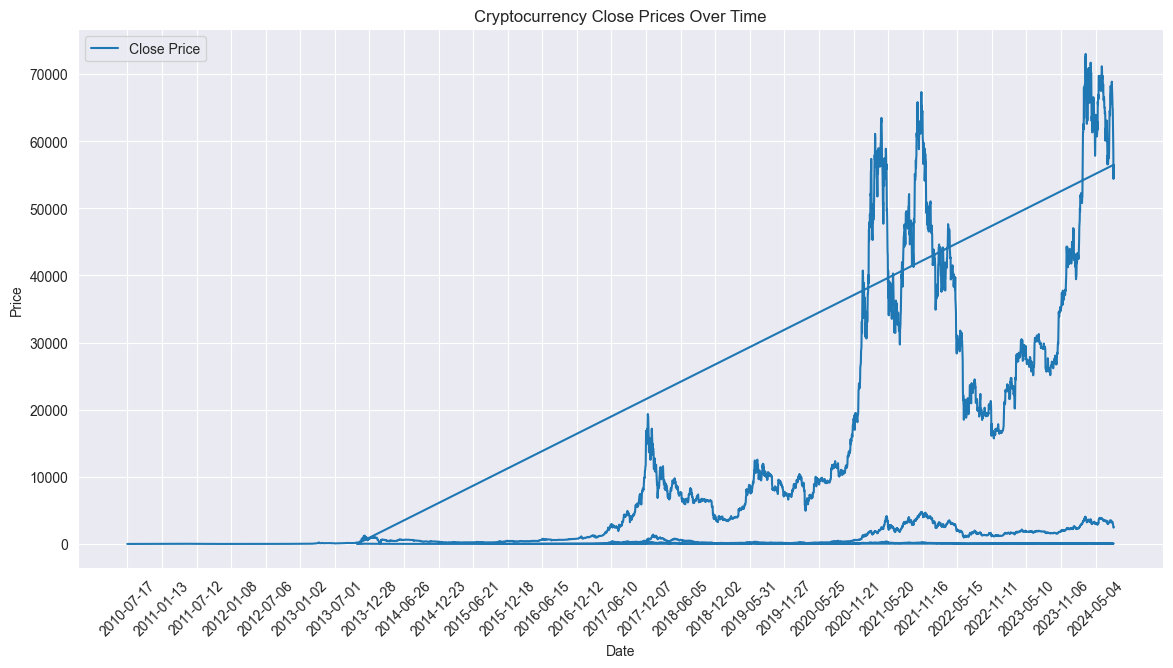

In [17]:
plt.figure(figsize=(14, 7))
plt.plot(crypto_data['date'], crypto_data['close'], label='Close Price')
plt.xticks(ticks=btc_df['date'][::180], rotation=45)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Cryptocurrency Close Prices Over Time')
plt.legend()
plt.show()

In [18]:
btc_df['date'] = pd.to_datetime(btc_df['date'])

In [19]:
btc_df.dtypes

ticker            object
date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
dtype: object

In [20]:
btc_df.head(5)

,ticker,date,open,high,low,close
0,BTC,2010-07-17,0.04951,0.04951,0.04951,0.04951
1,BTC,2010-07-18,0.04951,0.08585,0.04951,0.08584
2,BTC,2010-07-19,0.08584,0.09307,0.07723,0.08080
3,BTC,2010-07-20,0.08080,0.08181,0.07426,0.07474
4,BTC,2010-07-21,0.07474,0.07921,0.06634,0.07921


In [21]:
btc_df['day_of_week'] = btc_df['date'].dt.dayofweek

In [22]:
crypto_data['day_of_week'] = crypto_data['date'].dt.dayofweek

In [23]:
btc_df.groupby('day_of_week').mean('close')

,open,high,low,close
day_of_week,,,,
0,12228.777685,12588.421061,11868.394595,12272.670430
1,12272.319041,12570.963887,11924.884797,12260.585147
2,12200.240529,12553.713446,11865.918272,12247.366752
3,12246.715210,12542.325887,11891.794496,12214.873513
4,12214.024250,12523.980174,11841.186491,12203.693562
5,12186.721826,12418.780942,11976.145967,12218.441136
6,12218.170659,12446.512136,11962.018250,12228.862126


In [24]:
crypto_data.groupby('day_of_week').mean('close')

,open,high,low,close
day_of_week,,,,
0,5388.441791,5548.277963,5227.078615,5407.184589
1,5403.991253,5537.683554,5249.040151,5399.139668
2,5374.854306,5532.530628,5224.726862,5395.513619
3,5392.229856,5524.327596,5234.074354,5378.183367
4,5374.771998,5512.392271,5207.874929,5369.250518
5,5366.071736,5470.409534,5271.600299,5380.497709
6,5383.394374,5485.568216,5268.573085,5388.499628


In [25]:
btc_df['is_weekend'] = btc_df['date'].dt.weekday >= 5

In [26]:
btc_df.head(5)

,ticker,date,open,high,low,close,day_of_week,is_weekend
0,BTC,2010-07-17,0.04951,0.04951,0.04951,0.04951,5,True
1,BTC,2010-07-18,0.04951,0.08585,0.04951,0.08584,6,True
2,BTC,2010-07-19,0.08584,0.09307,0.07723,0.08080,0,False
3,BTC,2010-07-20,0.08080,0.08181,0.07426,0.07474,1,False
4,BTC,2010-07-21,0.07474,0.07921,0.06634,0.07921,2,False


In [86]:
crypto_data['is_weekend'] = crypto_data['day_of_week'] >= 5

In [88]:
crypto_data['is_weekend'] = crypto_data['is_weekend'].astype(int)

In [27]:
btc_df['quarter'] = btc_df['date'].dt.quarter
btc_df['month'] = btc_df['date'].dt.month

In [28]:
btc_df.head(5)

,ticker,date,open,high,low,close,day_of_week,is_weekend,quarter,month
0,BTC,2010-07-17,0.04951,0.04951,0.04951,0.04951,5,True,3,7
1,BTC,2010-07-18,0.04951,0.08585,0.04951,0.08584,6,True,3,7
2,BTC,2010-07-19,0.08584,0.09307,0.07723,0.08080,0,False,3,7
3,BTC,2010-07-20,0.08080,0.08181,0.07426,0.07474,1,False,3,7
4,BTC,2010-07-21,0.07474,0.07921,0.06634,0.07921,2,False,3,7


In [89]:
crypto_data['month'] = crypto_data['date'].dt.month
crypto_data['quarter'] = crypto_data['date'].dt.quarter

In [90]:
crypto_data.head(5)

,ticker,date,open,high,low,close,day_of_week,is_weekend,month,quarter
0,BTC,2010-07-17,0.04951,0.04951,0.04951,0.04951,5,1,7,3
1,BTC,2010-07-18,0.04951,0.08585,0.04951,0.08584,6,1,7,3
2,BTC,2010-07-19,0.08584,0.09307,0.07723,0.08080,0,0,7,3
3,BTC,2010-07-20,0.08080,0.08181,0.07426,0.07474,1,0,7,3
4,BTC,2010-07-21,0.07474,0.07921,0.06634,0.07921,2,0,7,3


In [29]:
quarterly_mean = btc_df.groupby('quarter')['close'].mean()

In [30]:
monthly_mean = btc_df.groupby('month')['open'].mean()

In [31]:
print("Quarterly mean: \n",quarterly_mean)
print("Monthly mean: \n", monthly_mean)

Quarterly mean: 
 quarter
1    13431.125873
2    14260.217157
3    10486.957144
4    10835.382779
Name: close, dtype: float64
Monthly mean: 
 month
1     11887.021853
2     13152.533344
3     15083.700878
4     15464.291983
5     14274.530369
6     13152.213119
7     12416.051548
8     10011.915293
9      8919.348558
10     9982.104588
11    11068.675724
12    11369.736765
Name: open, dtype: float64


In [91]:
quarterly_df_mean = crypto_data.groupby('quarter')['close'].mean()
monthly_df_mean = crypto_data.groupby('month')['open'].mean()
print("Quarterly mean: \n", quarterly_df_mean)
print("Monthly mean: \n", monthly_df_mean)

Quarterly mean: 
 quarter
1    5852.184046
2    6224.981614
3    4712.505526
4    4768.988222
Name: close, dtype: float64
Monthly mean: 
 month
1     5195.403064
2     5735.671006
3     6552.969680
4     6729.048485
5     6247.279862
6     5745.057429
7     5529.021498
8     4523.278186
9     4029.451490
10    4454.414140
11    4837.559974
12    4970.010091
Name: open, dtype: float64


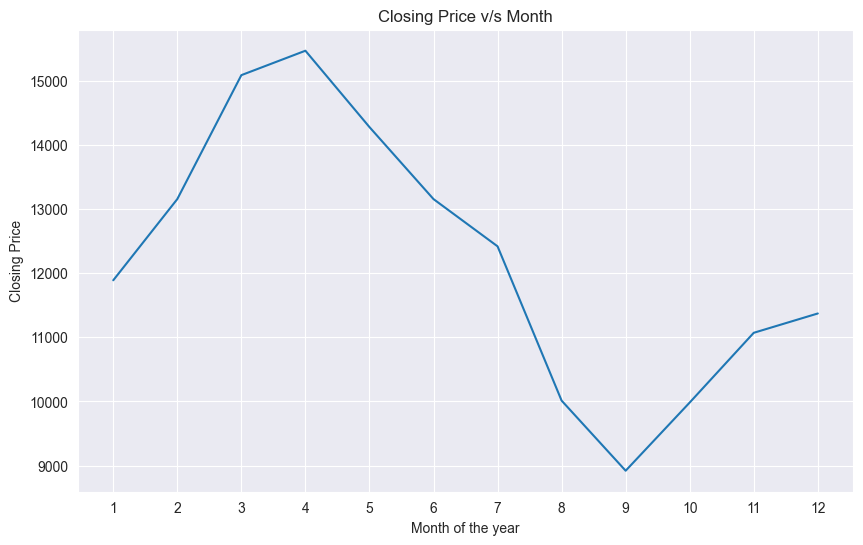

In [32]:
plt.figure(figsize=(10,6))
plt.plot(monthly_mean)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.xlabel("Month of the year")
plt.ylabel("Closing Price")
plt.title("Closing Price v/s Month")
plt.show()

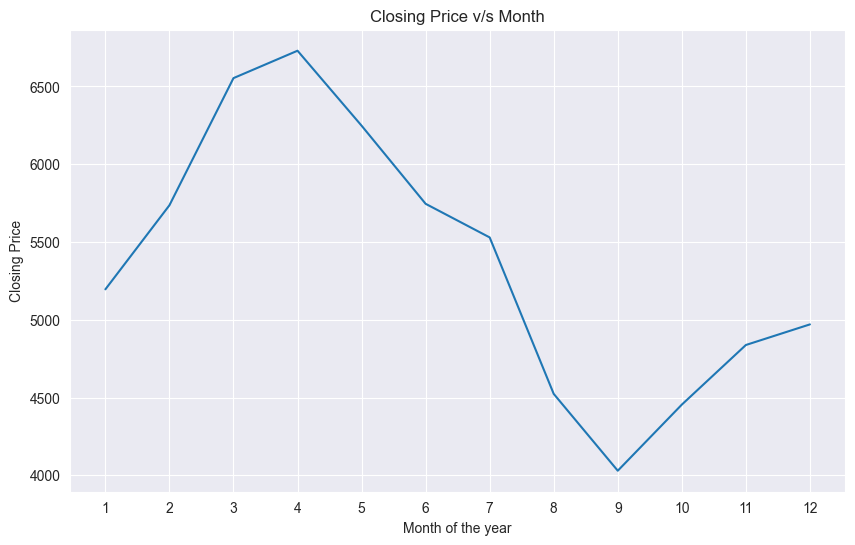

In [92]:
plt.figure(figsize=(10,6))
plt.plot(monthly_df_mean)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.xlabel("Month of the year")
plt.ylabel("Closing Price")
plt.title("Closing Price v/s Month")
plt.show()

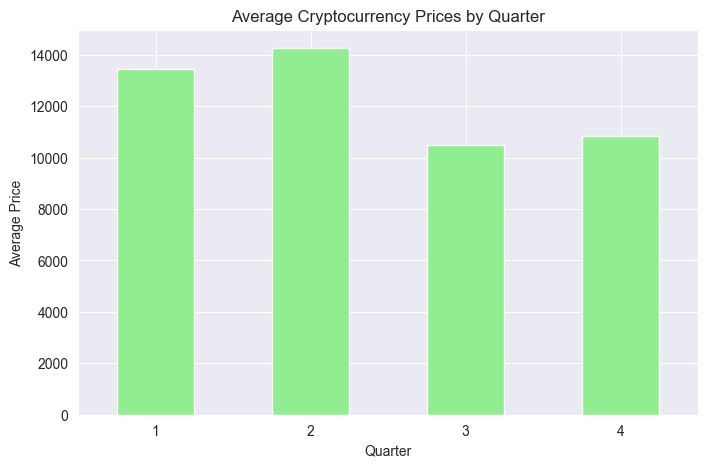

In [33]:
plt.figure(figsize=(8, 5))
quarterly_mean.plot(kind='bar', color='lightgreen')
plt.title('Average Cryptocurrency Prices by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()

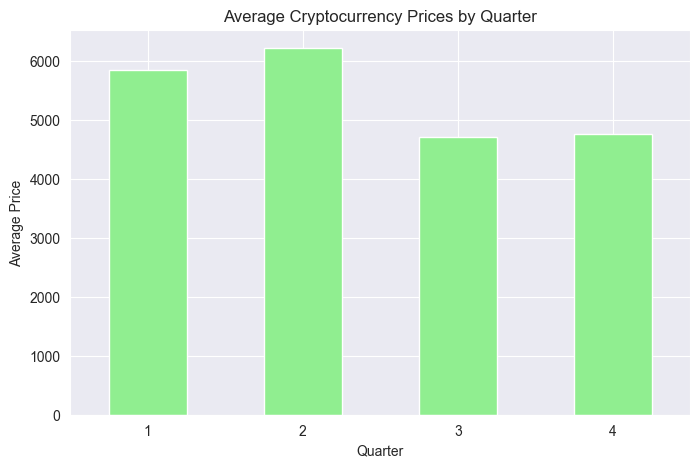

In [93]:
plt.figure(figsize=(8, 5))
quarterly_df_mean.plot(kind='bar', color='lightgreen')
plt.title('Average Cryptocurrency Prices by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()

### Cyclical Encoding Implementation

In this project, cyclical encoding is used to transform time-based features such as months, quarters, and days of the week into a format that better captures their cyclical nature. This encoding helps machine learning models understand the periodicity of these features, which is crucial for time series forecasting.

#### Steps for Cyclical Encoding:

1. **Extract Time-Based Features:**
   - Extract the month, quarter, and day of the week from the date column.

2. **Apply Sine and Cosine Transformations:**
   - For each time-based feature, apply sine and cosine transformations to capture the cyclical pattern. This involves converting the time-based features into two new features using the sine and cosine functions. For example, for a month feature, the transformations would be:
     - `month_sin = sin(2 * π * month / 12)`
     - `month_cos = cos(2 * π * month / 12)`
   - Similar transformations are applied to the quarter and day of the week features.

3. **Add Transformed Features to the Dataset:**
   - Add the sine and cosine transformed features back to the dataset. This step ensures that the cyclical nature of the time-based features is preserved and can be utilized by the machine learning models.

4. **Drop Original Time-Based Features:**
   - After adding the transformed features, drop the original time-based features from the dataset. This step is necessary to avoid redundancy and potential multicollinearity in the dataset.

#### Summary:

The cyclical encoding ensures that the model can effectively learn and utilize the periodic patterns in the data, leading to more accurate predictions. This approach is particularly useful for time series forecasting tasks where understanding the cyclical nature of time-based features is essential.

### Explanation of Cyclical Encoding example for Quarters

In this project, cyclical encoding is used to transform the `quarter` feature into a format that better captures its cyclical nature. This encoding helps machine learning models understand the periodicity of the quarters, which is crucial for time series forecasting.

#### Code Explanation:

```python
btc_df['quarter_sin'] = np.sin(2 * np.pi * btc_df['quarter'] / 4)
btc_df['quarter_cos'] = np.cos(2 * np.pi * (btc_df['quarter'] / 4))
```

1. **Purpose**:
   - The goal is to encode the `quarter` feature (which ranges from 1 to 4) into two new features: `quarter_sin` and `quarter_cos`. These new features will represent the cyclical nature of the quarters.

2. **Mathematical Transformation**:
   - **Sine Transformation**: `quarter_sin = np.sin(2 * π * quarter / 4)`
     - This transformation converts the `quarter` value into a sine value, which captures the cyclical pattern.
   - **Cosine Transformation**: `quarter_cos = np.cos(2 * π * (quarter / 4))`
     - This transformation converts the `quarter` value into a cosine value, which also captures the cyclical pattern.

3. **Why Use Sine and Cosine**:
   - Sine and cosine functions are periodic and can effectively represent cyclical patterns. By using these transformations, the model can better understand the cyclical nature of the quarters.

4. **Range of Values**:
   - The sine and cosine transformations will map the `quarter` values to a range between -1 and 1, preserving the cyclical relationship.

5. **Implementation**:
   - The code applies the sine and cosine transformations to the `quarter` feature and adds the resulting values as new columns (`quarter_sin` and `quarter_cos`) in the `btc_df` DataFrame.

#### Summary:

By transforming the `quarter` feature into `quarter_sin` and `quarter_cos`, the cyclical nature of the quarters is preserved, allowing the machine learning model to better capture and utilize the periodic patterns in the data. This approach is particularly useful for time series forecasting tasks.

In [34]:
btc_df['month_sin'] = np.sin(2*np.pi*(btc_df['month']/12))

In [35]:
btc_df['month_cos'] = np.cos(2*np.pi*(btc_df['month']/12))

In [36]:
btc_df.head(5)

,ticker,date,open,high,low,close,day_of_week,is_weekend,quarter,month,month_sin,month_cos
0,BTC,2010-07-17,0.04951,0.04951,0.04951,0.04951,5,True,3,7,-0.5,-0.866025
1,BTC,2010-07-18,0.04951,0.08585,0.04951,0.08584,6,True,3,7,-0.5,-0.866025
2,BTC,2010-07-19,0.08584,0.09307,0.07723,0.08080,0,False,3,7,-0.5,-0.866025
3,BTC,2010-07-20,0.08080,0.08181,0.07426,0.07474,1,False,3,7,-0.5,-0.866025
4,BTC,2010-07-21,0.07474,0.07921,0.06634,0.07921,2,False,3,7,-0.5,-0.866025


In [94]:
crypto_data['month_sin'] = np.sin(2*np.pi*(crypto_data['month']/12))
crypto_data['month_cos'] = np.cos(2*np.pi*(crypto_data['month']/12))

In [95]:
crypto_data.head(5)

,ticker,date,open,high,low,close,day_of_week,is_weekend,month,quarter,month_sin,month_cos
0,BTC,2010-07-17,0.04951,0.04951,0.04951,0.04951,5,1,7,3,-0.5,-0.866025
1,BTC,2010-07-18,0.04951,0.08585,0.04951,0.08584,6,1,7,3,-0.5,-0.866025
2,BTC,2010-07-19,0.08584,0.09307,0.07723,0.08080,0,0,7,3,-0.5,-0.866025
3,BTC,2010-07-20,0.08080,0.08181,0.07426,0.07474,1,0,7,3,-0.5,-0.866025
4,BTC,2010-07-21,0.07474,0.07921,0.06634,0.07921,2,0,7,3,-0.5,-0.866025


In [37]:
btc_df['quarter'].unique()

array([3, 4, 1, 2])

In [38]:
btc_df['quarter_sin'] = np.sin(2*np.pi*btc_df['quarter']/4)
btc_df['quarter_cos'] = np.cos(2*np.pi*(btc_df['quarter']/4))

In [39]:
btc_df.head()

,ticker,date,open,high,low,close,day_of_week,is_weekend,quarter,month,month_sin,month_cos,quarter_sin,quarter_cos
0,BTC,2010-07-17,0.04951,0.04951,0.04951,0.04951,5,True,3,7,-0.5,-0.866025,-1.0,-1.836970e-16
1,BTC,2010-07-18,0.04951,0.08585,0.04951,0.08584,6,True,3,7,-0.5,-0.866025,-1.0,-1.836970e-16
2,BTC,2010-07-19,0.08584,0.09307,0.07723,0.08080,0,False,3,7,-0.5,-0.866025,-1.0,-1.836970e-16
3,BTC,2010-07-20,0.08080,0.08181,0.07426,0.07474,1,False,3,7,-0.5,-0.866025,-1.0,-1.836970e-16
4,BTC,2010-07-21,0.07474,0.07921,0.06634,0.07921,2,False,3,7,-0.5,-0.866025,-1.0,-1.836970e-16


In [96]:
crypto_data['quarter_sin'] = np.sin(2 * np.pi * crypto_data['quarter'] / 4)
crypto_data['quarter_cos'] = np.cos(2 * np.pi * (crypto_data['quarter'] / 4))
crypto_data.head()

,ticker,date,open,high,low,close,day_of_week,is_weekend,month,quarter,month_sin,month_cos,quarter_sin,quarter_cos
0,BTC,2010-07-17,0.04951,0.04951,0.04951,0.04951,5,1,7,3,-0.5,-0.866025,-1.0,-1.836970e-16
1,BTC,2010-07-18,0.04951,0.08585,0.04951,0.08584,6,1,7,3,-0.5,-0.866025,-1.0,-1.836970e-16
2,BTC,2010-07-19,0.08584,0.09307,0.07723,0.08080,0,0,7,3,-0.5,-0.866025,-1.0,-1.836970e-16
3,BTC,2010-07-20,0.08080,0.08181,0.07426,0.07474,1,0,7,3,-0.5,-0.866025,-1.0,-1.836970e-16
4,BTC,2010-07-21,0.07474,0.07921,0.06634,0.07921,2,0,7,3,-0.5,-0.866025,-1.0,-1.836970e-16


In [40]:
btc_df['day_of_week_sin'] = np.sin(2 * np.pi * btc_df['day_of_week'] / 7)
btc_df['day_of_week_cos'] = np.cos(2 * np.pi * btc_df['day_of_week'] / 7)

In [41]:
btc_df.head(5)

,ticker,date,open,high,low,close,day_of_week,is_weekend,quarter,month,month_sin,month_cos,quarter_sin,quarter_cos,day_of_week_sin,day_of_week_cos
0,BTC,2010-07-17,0.04951,0.04951,0.04951,0.04951,5,True,3,7,-0.5,-0.866025,-1.0,-1.836970e-16,-0.974928,-0.222521
1,BTC,2010-07-18,0.04951,0.08585,0.04951,0.08584,6,True,3,7,-0.5,-0.866025,-1.0,-1.836970e-16,-0.781831,0.623490
2,BTC,2010-07-19,0.08584,0.09307,0.07723,0.08080,0,False,3,7,-0.5,-0.866025,-1.0,-1.836970e-16,0.000000,1.000000
3,BTC,2010-07-20,0.08080,0.08181,0.07426,0.07474,1,False,3,7,-0.5,-0.866025,-1.0,-1.836970e-16,0.781831,0.623490
4,BTC,2010-07-21,0.07474,0.07921,0.06634,0.07921,2,False,3,7,-0.5,-0.866025,-1.0,-1.836970e-16,0.974928,-0.222521


In [97]:
crypto_data['day_of_week_sin'] = np.sin(2 * np.pi * crypto_data['day_of_week'] / 7)
crypto_data['day_of_week_cos'] = np.cos(2 * np.pi * crypto_data['day_of_week'] / 7)
crypto_data.head(5)

,ticker,date,open,high,low,close,day_of_week,is_weekend,month,quarter,month_sin,month_cos,quarter_sin,quarter_cos,day_of_week_sin,day_of_week_cos
0,BTC,2010-07-17,0.04951,0.04951,0.04951,0.04951,5,1,7,3,-0.5,-0.866025,-1.0,-1.836970e-16,-0.974928,-0.222521
1,BTC,2010-07-18,0.04951,0.08585,0.04951,0.08584,6,1,7,3,-0.5,-0.866025,-1.0,-1.836970e-16,-0.781831,0.623490
2,BTC,2010-07-19,0.08584,0.09307,0.07723,0.08080,0,0,7,3,-0.5,-0.866025,-1.0,-1.836970e-16,0.000000,1.000000
3,BTC,2010-07-20,0.08080,0.08181,0.07426,0.07474,1,0,7,3,-0.5,-0.866025,-1.0,-1.836970e-16,0.781831,0.623490
4,BTC,2010-07-21,0.07474,0.07921,0.06634,0.07921,2,0,7,3,-0.5,-0.866025,-1.0,-1.836970e-16,0.974928,-0.222521


In [42]:
btc_df.drop(columns=['day_of_week', 'month', 'quarter']).head(5)

,ticker,date,open,high,low,close,is_weekend,month_sin,month_cos,quarter_sin,quarter_cos,day_of_week_sin,day_of_week_cos
0,BTC,2010-07-17,0.04951,0.04951,0.04951,0.04951,True,-0.5,-0.866025,-1.0,-1.836970e-16,-0.974928,-0.222521
1,BTC,2010-07-18,0.04951,0.08585,0.04951,0.08584,True,-0.5,-0.866025,-1.0,-1.836970e-16,-0.781831,0.623490
2,BTC,2010-07-19,0.08584,0.09307,0.07723,0.08080,False,-0.5,-0.866025,-1.0,-1.836970e-16,0.000000,1.000000
3,BTC,2010-07-20,0.08080,0.08181,0.07426,0.07474,False,-0.5,-0.866025,-1.0,-1.836970e-16,0.781831,0.623490
4,BTC,2010-07-21,0.07474,0.07921,0.06634,0.07921,False,-0.5,-0.866025,-1.0,-1.836970e-16,0.974928,-0.222521


In [98]:
crypto_data.drop(columns=['day_of_week', 'month', 'quarter']).head(5)

,ticker,date,open,high,low,close,is_weekend,month_sin,month_cos,quarter_sin,quarter_cos,day_of_week_sin,day_of_week_cos
0,BTC,2010-07-17,0.04951,0.04951,0.04951,0.04951,1,-0.5,-0.866025,-1.0,-1.836970e-16,-0.974928,-0.222521
1,BTC,2010-07-18,0.04951,0.08585,0.04951,0.08584,1,-0.5,-0.866025,-1.0,-1.836970e-16,-0.781831,0.623490
2,BTC,2010-07-19,0.08584,0.09307,0.07723,0.08080,0,-0.5,-0.866025,-1.0,-1.836970e-16,0.000000,1.000000
3,BTC,2010-07-20,0.08080,0.08181,0.07426,0.07474,0,-0.5,-0.866025,-1.0,-1.836970e-16,0.781831,0.623490
4,BTC,2010-07-21,0.07474,0.07921,0.06634,0.07921,0,-0.5,-0.866025,-1.0,-1.836970e-16,0.974928,-0.222521


## Lag Features

### **ACF and PACF Analysis**

In time series forecasting, understanding the relationships between current and past values is crucial. The Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) are tools that help identify these relationships.

- **ACF** shows the correlation between a time series and its lagged values, helping to identify patterns like seasonality.
- **PACF** isolates the impact of individual lags by controlling for shorter lags, helping us determine which past values are most directly related to the current value.

By analyzing these plots, we can choose the most relevant lag features for our forecasting model, improving its accuracy.

In [43]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [99]:
series = btc_df['close']
series_df = crypto_data['close']

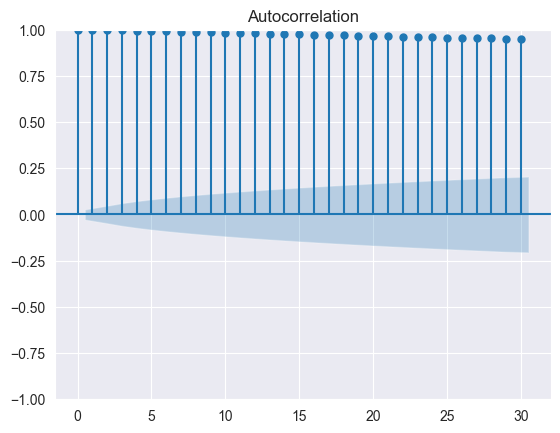

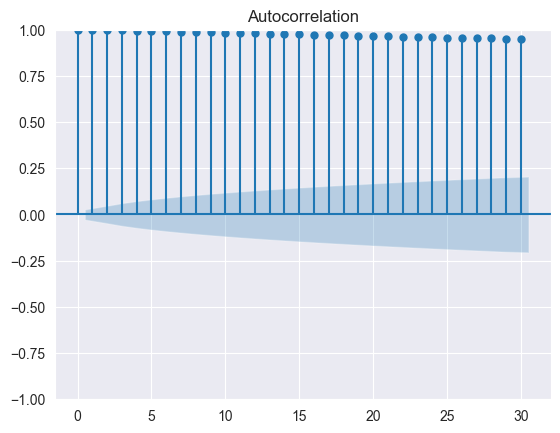

In [45]:
plot_acf(series, lags=30)

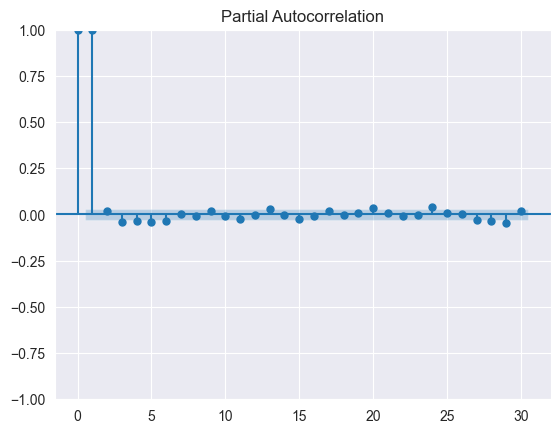

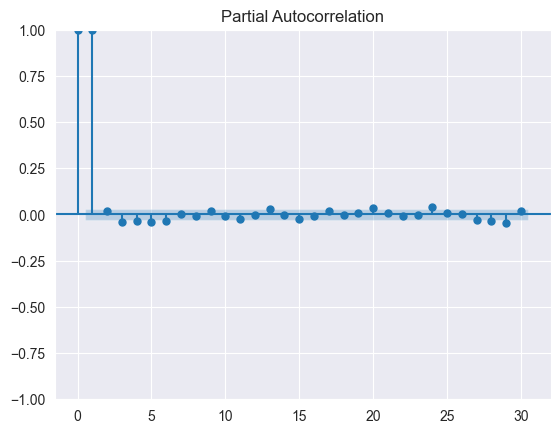

In [46]:
plot_pacf(series, lags=30)

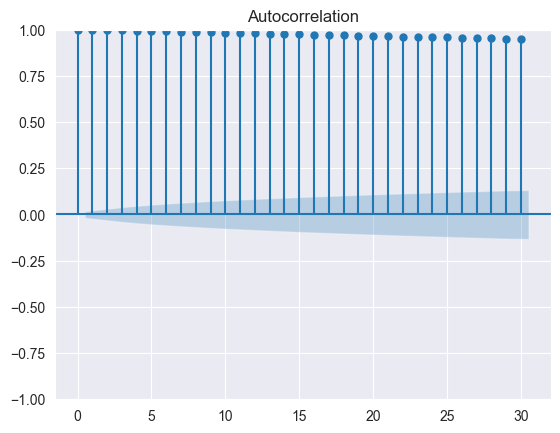

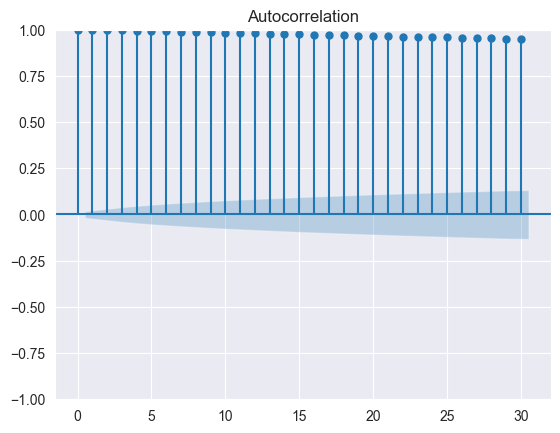

In [100]:
plot_acf(series_df, lags=30)

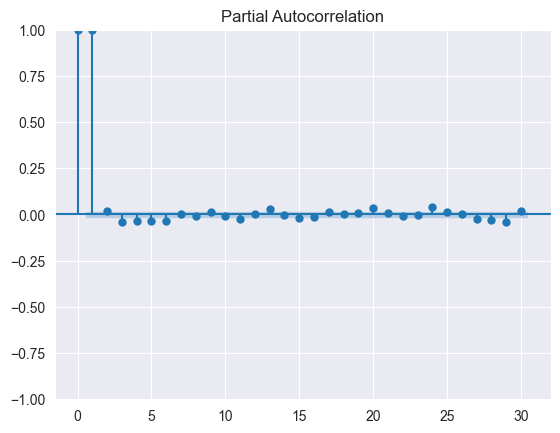

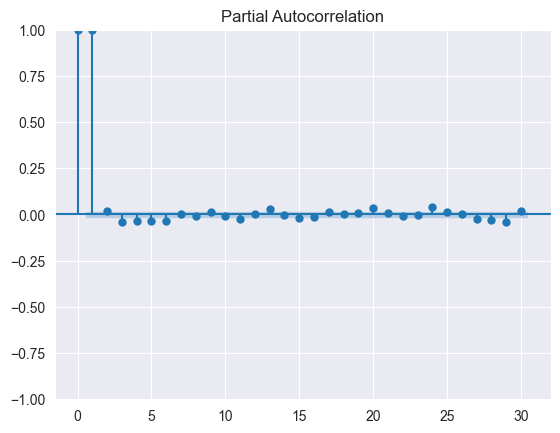

In [101]:
plot_pacf(series_df, lags=30)

### **Why It's Done (According to ACF and PACF Analysis)**

- **Purpose of Lag Features (Based on ACF and PACF):**
  - **ACF (Autocorrelation Function) Analysis:** 
    - The ACF plot helps identify the overall correlation of the current value of the time series with its past values. If the ACF plot shows significant correlations at specific lags, it indicates that past values (lags) are relevant for predicting future values. In your case, the ACF plot indicated strong correlations across multiple lags, suggesting that past closing prices significantly influence the current price. Therefore, lag features are created to capture these relationships.
  
  - **PACF (Partial Autocorrelation Function) Analysis:**
    - The PACF plot, on the other hand, shows the direct correlation between a value and its lagged values, after removing the influence of intervening lags. The PACF plot helps in identifying the most relevant lag values to include. If significant spikes are observed at certain lags (like Lag 1 and Lag 2 in your PACF plot), it implies that these lags have a direct and strong influence on the current value, independent of other lags. Thus, the creation of `'Lag_1'` and `'Lag_2'` is directly informed by the PACF analysis, which suggests these particular lags as important predictors.

- **Incorporating Temporal Dependencies:**
  - By including lag features that are suggested by ACF and PACF analysis, you enable your model to utilize important temporal dependencies in the data. This ensures that the model captures both the direct (PACF) and overall (ACF) influence of past values on the current and future prices. This approach improves the model's forecasting ability by aligning feature selection with the underlying data structure revealed by ACF and PACF plots.

In [47]:
btc_df['Lag_1'] = btc_df['close'].shift(1)
btc_df['Lag_2'] = btc_df['close'].shift(2)

In [48]:
btc_df.head(5)

,ticker,date,open,high,low,close,day_of_week,is_weekend,quarter,month,month_sin,month_cos,quarter_sin,quarter_cos,day_of_week_sin,day_of_week_cos,Lag_1,Lag_2
0,BTC,2010-07-17,0.04951,0.04951,0.04951,0.04951,5,True,3,7,-0.5,-0.866025,-1.0,-1.836970e-16,-0.974928,-0.222521,NaN,NaN
1,BTC,2010-07-18,0.04951,0.08585,0.04951,0.08584,6,True,3,7,-0.5,-0.866025,-1.0,-1.836970e-16,-0.781831,0.623490,0.04951,NaN
2,BTC,2010-07-19,0.08584,0.09307,0.07723,0.08080,0,False,3,7,-0.5,-0.866025,-1.0,-1.836970e-16,0.000000,1.000000,0.08584,0.04951
3,BTC,2010-07-20,0.08080,0.08181,0.07426,0.07474,1,False,3,7,-0.5,-0.866025,-1.0,-1.836970e-16,0.781831,0.623490,0.08080,0.08584
4,BTC,2010-07-21,0.07474,0.07921,0.06634,0.07921,2,False,3,7,-0.5,-0.866025,-1.0,-1.836970e-16,0.974928,-0.222521,0.07474,0.08080


In [102]:
crypto_data['Lag_1'] = crypto_data['close'].shift(1)
crypto_data['Lag_2'] = crypto_data['close'].shift(2)
crypto_data.head(5)

,ticker,date,open,high,low,close,day_of_week,is_weekend,month,quarter,month_sin,month_cos,quarter_sin,quarter_cos,day_of_week_sin,day_of_week_cos,Lag_1,Lag_2
0,BTC,2010-07-17,0.04951,0.04951,0.04951,0.04951,5,1,7,3,-0.5,-0.866025,-1.0,-1.836970e-16,-0.974928,-0.222521,NaN,NaN
1,BTC,2010-07-18,0.04951,0.08585,0.04951,0.08584,6,1,7,3,-0.5,-0.866025,-1.0,-1.836970e-16,-0.781831,0.623490,0.04951,NaN
2,BTC,2010-07-19,0.08584,0.09307,0.07723,0.08080,0,0,7,3,-0.5,-0.866025,-1.0,-1.836970e-16,0.000000,1.000000,0.08584,0.04951
3,BTC,2010-07-20,0.08080,0.08181,0.07426,0.07474,1,0,7,3,-0.5,-0.866025,-1.0,-1.836970e-16,0.781831,0.623490,0.08080,0.08584
4,BTC,2010-07-21,0.07474,0.07921,0.06634,0.07921,2,0,7,3,-0.5,-0.866025,-1.0,-1.836970e-16,0.974928,-0.222521,0.07474,0.08080


## **Rolling Statistics**

### Code Descriptions

- **Summary Statistics:** Provides an overview of key statistical measures for each numerical column, such as mean, standard deviation, and range. This helps understand the data's distribution and variability.

- **7-Day Rolling Standard Deviation Calculation:** Computes the standard deviation of the closing prices over a 7-day window. This measure captures short-term volatility and trends, which is important for assessing recent market fluctuations.

- **Check for Missing Values:** Identifies and counts missing values in the DataFrame, allowing for the detection of any gaps in the data that need to be addressed.

- **Drop Missing Values:** Removes rows with missing values in the `7d_rolling_std` column. This ensures that the dataset used for analysis or modeling is complete and reliable.

In [49]:
btc_df.describe()

,date,open,high,low,close,day_of_week,quarter,month,month_sin,month_cos,quarter_sin,quarter_cos,day_of_week_sin,day_of_week_cos,Lag_1,Lag_2
count,5135,5135.000000,5135.000000,5135.000000,5135.00000,5135.000000,5135.000000,5135.000000,5.135000e+03,5.135000e+03,5.135000e+03,5.135000e+03,5135.000000,5135.000000,5134.000000,5133.000000
mean,2017-07-27 00:00:00,12223.854803,12520.659780,11904.356916,12235.22097,3.000000,2.510419,6.525609,-7.152770e-03,-5.085635e-03,-8.763389e-03,2.726388e-03,-0.000190,0.000394,12226.603074,12218.391678
min,2010-07-17 00:00:00,0.049510,0.049510,0.010000,0.04951,0.000000,1.000000,1.000000,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-0.974928,-0.900969,0.049510,0.049510
25%,2014-01-20 12:00:00,231.740000,236.340000,226.455000,231.93000,1.000000,2.000000,4.000000,-8.660254e-01,-8.660254e-01,-1.000000e+00,-1.836970e-16,-0.781831,-0.900969,231.885000,231.840000
50%,2017-07-27 00:00:00,2806.750000,2880.950000,2699.480000,2809.99000,3.000000,3.000000,7.000000,-2.449294e-16,-1.836970e-16,-2.449294e-16,-1.836970e-16,0.000000,-0.222521,2808.370000,2806.750000
75%,2021-01-30 12:00:00,18499.450000,19144.950000,17697.650000,18537.15000,5.000000,4.000000,10.000000,5.000000e-01,8.660254e-01,1.224647e-16,1.000000e+00,0.781831,0.623490,18509.325000,18494.700000
max,2024-08-06 00:00:00,72988.300000,73672.600000,71041.100000,72987.60000,6.000000,4.000000,12.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.974928,1.000000,72987.600000,72987.600000
std,NaN,17917.893272,18333.748584,17461.844713,17928.10973,2.000682,1.115391,3.442566,7.055194e-01,7.087737e-01,7.078784e-01,7.064125e-01,0.707199,0.707152,17919.215807,17911.298813


In [103]:
crypto_data.describe()

,date,open,high,low,close,day_of_week,is_weekend,month,quarter,month_sin,month_cos,quarter_sin,quarter_cos,day_of_week_sin,day_of_week_cos,Lag_1,Lag_2
count,12361,12361.000000,12361.000000,12361.000000,12361.000000,12361.000000,12361.000000,12361.000000,12361.000000,1.236100e+04,1.236100e+04,1.236100e+04,1.236100e+04,12361.000000,12361.000000,12360.000000,12359.000000
mean,2018-10-05 19:22:23.483536896,5383.394548,5515.878960,5240.430315,5388.324056,3.000162,0.285818,6.508130,2.504166,1.418871e-04,-3.050173e-03,-1.779791e-03,8.898956e-04,-0.000208,0.000141,5388.558245,5388.797855
min,2010-07-17 00:00:00,0.049510,0.049510,0.010000,0.049510,0.000000,0.000000,1.000000,1.000000,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-0.974928,-0.900969,0.049510,0.049510
25%,2016-02-20 00:00:00,43.220000,44.480000,41.690000,43.290000,1.000000,0.000000,4.000000,2.000000,-5.000000e-01,-8.660254e-01,-1.000000e+00,-1.000000e+00,-0.781831,-0.900969,43.280000,43.270000
50%,2018-12-16 00:00:00,211.650000,221.450000,203.030000,211.690000,3.000000,0.000000,7.000000,3.000000,-2.449294e-16,-1.836970e-16,-2.449294e-16,-1.836970e-16,0.000000,-0.222521,211.670000,211.650000
75%,2021-10-11 00:00:00,2536.460000,2623.710000,2454.810000,2538.030000,5.000000,1.000000,10.000000,4.000000,5.000000e-01,8.660254e-01,1.224647e-16,1.000000e+00,0.781831,0.623490,2538.412500,2538.795000
max,2024-08-06 00:00:00,72988.300000,73672.600000,71041.100000,72987.600000,6.000000,1.000000,12.000000,4.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.974928,1.000000,72987.600000,72987.600000
std,NaN,12928.219991,13230.541678,12598.006591,12936.532145,2.000283,0.451822,3.451319,1.117673,7.041687e-01,7.100831e-01,7.060740e-01,7.081924e-01,0.707134,0.707137,12937.029296,12937.525286


In [50]:
btc_df.std(numeric_only=True)

open               17917.893272
high               18333.748584
low                17461.844713
close              17928.109730
day_of_week            2.000682
is_weekend             0.451877
quarter                1.115391
month                  3.442566
month_sin              0.705519
month_cos              0.708774
quarter_sin            0.707878
quarter_cos            0.706413
day_of_week_sin        0.707199
day_of_week_cos        0.707152
Lag_1              17919.215807
Lag_2              17911.298813
dtype: float64

In [104]:
crypto_data.std(numeric_only=True)

open               12928.219991
high               13230.541678
low                12598.006591
close              12936.532145
day_of_week            2.000283
is_weekend             0.451822
month                  3.451319
quarter                1.117673
month_sin              0.704169
month_cos              0.710083
quarter_sin            0.706074
quarter_cos            0.708192
day_of_week_sin        0.707134
day_of_week_cos        0.707137
Lag_1              12937.029296
Lag_2              12937.525286
dtype: float64

In [51]:
btc_df['7d_rolling_std'] = btc_df['close'].rolling(window=7).std()

In [52]:
btc_df.head(5)

,ticker,date,open,high,low,close,day_of_week,is_weekend,quarter,month,month_sin,month_cos,quarter_sin,quarter_cos,day_of_week_sin,day_of_week_cos,Lag_1,Lag_2,7d_rolling_std
0,BTC,2010-07-17,0.04951,0.04951,0.04951,0.04951,5,True,3,7,-0.5,-0.866025,-1.0,-1.836970e-16,-0.974928,-0.222521,NaN,NaN,NaN
1,BTC,2010-07-18,0.04951,0.08585,0.04951,0.08584,6,True,3,7,-0.5,-0.866025,-1.0,-1.836970e-16,-0.781831,0.623490,0.04951,NaN,NaN
2,BTC,2010-07-19,0.08584,0.09307,0.07723,0.08080,0,False,3,7,-0.5,-0.866025,-1.0,-1.836970e-16,0.000000,1.000000,0.08584,0.04951,NaN
3,BTC,2010-07-20,0.08080,0.08181,0.07426,0.07474,1,False,3,7,-0.5,-0.866025,-1.0,-1.836970e-16,0.781831,0.623490,0.08080,0.08584,NaN
4,BTC,2010-07-21,0.07474,0.07921,0.06634,0.07921,2,False,3,7,-0.5,-0.866025,-1.0,-1.836970e-16,0.974928,-0.222521,0.07474,0.08080,NaN


In [105]:
crypto_data['7d_rolling_std'] = crypto_data['close'].rolling(window=7).std()
crypto_data.head(5)

,ticker,date,open,high,low,close,day_of_week,is_weekend,month,quarter,month_sin,month_cos,quarter_sin,quarter_cos,day_of_week_sin,day_of_week_cos,Lag_1,Lag_2,7d_rolling_std
0,BTC,2010-07-17,0.04951,0.04951,0.04951,0.04951,5,1,7,3,-0.5,-0.866025,-1.0,-1.836970e-16,-0.974928,-0.222521,NaN,NaN,NaN
1,BTC,2010-07-18,0.04951,0.08585,0.04951,0.08584,6,1,7,3,-0.5,-0.866025,-1.0,-1.836970e-16,-0.781831,0.623490,0.04951,NaN,NaN
2,BTC,2010-07-19,0.08584,0.09307,0.07723,0.08080,0,0,7,3,-0.5,-0.866025,-1.0,-1.836970e-16,0.000000,1.000000,0.08584,0.04951,NaN
3,BTC,2010-07-20,0.08080,0.08181,0.07426,0.07474,1,0,7,3,-0.5,-0.866025,-1.0,-1.836970e-16,0.781831,0.623490,0.08080,0.08584,NaN
4,BTC,2010-07-21,0.07474,0.07921,0.06634,0.07921,2,0,7,3,-0.5,-0.866025,-1.0,-1.836970e-16,0.974928,-0.222521,0.07474,0.08080,NaN


In [53]:
btc_df.isna().sum()

ticker             0
date               0
open               0
high               0
low                0
close              0
day_of_week        0
is_weekend         0
quarter            0
month              0
month_sin          0
month_cos          0
quarter_sin        0
quarter_cos        0
day_of_week_sin    0
day_of_week_cos    0
Lag_1              1
Lag_2              2
7d_rolling_std     6
dtype: int64

In [106]:
crypto_data.isna().sum()

ticker             0
date               0
open               0
high               0
low                0
close              0
day_of_week        0
is_weekend         0
month              0
quarter            0
month_sin          0
month_cos          0
quarter_sin        0
quarter_cos        0
day_of_week_sin    0
day_of_week_cos    0
Lag_1              1
Lag_2              2
7d_rolling_std     6
dtype: int64

In [54]:
btc_df.dropna(subset=['7d_rolling_std'], inplace=True)

In [55]:
btc_df.head(5)

,ticker,date,open,high,low,close,day_of_week,is_weekend,quarter,month,month_sin,month_cos,quarter_sin,quarter_cos,day_of_week_sin,day_of_week_cos,Lag_1,Lag_2,7d_rolling_std
6,BTC,2010-07-23,0.05050,0.06767,0.05050,0.06262,4,False,3,7,-0.5,-0.866025,-1.0,-1.836970e-16,-0.433884,-0.900969,0.05050,0.07921,0.014848
7,BTC,2010-07-24,0.06262,0.06262,0.05049,0.05454,5,True,3,7,-0.5,-0.866025,-1.0,-1.836970e-16,-0.974928,-0.222521,0.06262,0.05050,0.013833
8,BTC,2010-07-25,0.05454,0.05941,0.05050,0.05050,6,True,3,7,-0.5,-0.866025,-1.0,-1.836970e-16,-0.781831,0.623490,0.05454,0.06262,0.013425
9,BTC,2010-07-26,0.05050,0.05600,0.05000,0.05600,0,False,3,7,-0.5,-0.866025,-1.0,-1.836970e-16,0.000000,1.000000,0.05050,0.05454,0.011619
10,BTC,2010-07-27,0.05600,0.06050,0.05300,0.06000,1,False,3,7,-0.5,-0.866025,-1.0,-1.836970e-16,0.781831,0.623490,0.05600,0.05050,0.009966


In [107]:
crypto_data.dropna(subset=['7d_rolling_std'], inplace=True)
crypto_data.head(5)

,ticker,date,open,high,low,close,day_of_week,is_weekend,month,quarter,month_sin,month_cos,quarter_sin,quarter_cos,day_of_week_sin,day_of_week_cos,Lag_1,Lag_2,7d_rolling_std
6,BTC,2010-07-23,0.05050,0.06767,0.05050,0.06262,4,0,7,3,-0.5,-0.866025,-1.0,-1.836970e-16,-0.433884,-0.900969,0.05050,0.07921,0.014848
7,BTC,2010-07-24,0.06262,0.06262,0.05049,0.05454,5,1,7,3,-0.5,-0.866025,-1.0,-1.836970e-16,-0.974928,-0.222521,0.06262,0.05050,0.013833
8,BTC,2010-07-25,0.05454,0.05941,0.05050,0.05050,6,1,7,3,-0.5,-0.866025,-1.0,-1.836970e-16,-0.781831,0.623490,0.05454,0.06262,0.013425
9,BTC,2010-07-26,0.05050,0.05600,0.05000,0.05600,0,0,7,3,-0.5,-0.866025,-1.0,-1.836970e-16,0.000000,1.000000,0.05050,0.05454,0.011619
10,BTC,2010-07-27,0.05600,0.06050,0.05300,0.06000,1,0,7,3,-0.5,-0.866025,-1.0,-1.836970e-16,0.781831,0.623490,0.05600,0.05050,0.009966


In [56]:
btc_df['is_weekend']=btc_df['is_weekend'].replace({True: 1, False: 0})

## **Model**

In [119]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import xgboost
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [111]:
x = btc_df.drop(['ticker', 'close', 'date'], axis=1)
y = btc_df['close']

In [120]:
x_df = crypto_data.drop(['date', 'close'], axis=1)
y_df = crypto_data['close']

In [121]:
print(f"X_df shape: {x_df.shape}")
print(f"y_df shape: {y_df.shape}")

X_df shape: (12355, 17)
y_df shape: (12355,)


In [122]:
x.shape

(5129, 16)

In [123]:
y.shape

(5129,)

In [124]:
x.dtypes

open               float64
high               float64
low                float64
day_of_week          int32
is_weekend           int64
quarter              int32
month                int32
month_sin          float64
month_cos          float64
quarter_sin        float64
quarter_cos        float64
day_of_week_sin    float64
day_of_week_cos    float64
Lag_1              float64
Lag_2              float64
7d_rolling_std     float64
dtype: object

In [125]:
x_df.dtypes

ticker              object
open               float64
high               float64
low                float64
day_of_week          int32
is_weekend           int32
month                int32
quarter              int32
month_sin          float64
month_cos          float64
quarter_sin        float64
quarter_cos        float64
day_of_week_sin    float64
day_of_week_cos    float64
Lag_1              float64
Lag_2              float64
7d_rolling_std     float64
dtype: object

In [126]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [127]:
x_df_train, x_df_test, y_df_train, y_df_test = train_test_split(x_df, y_df, test_size=0.2)

In [128]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4103, 16)
(1026, 16)
(4103,)
(1026,)


In [129]:
print(x_df_train.shape)
print(x_df_test.shape)

(9884, 17)
(2471, 17)


In [130]:
columns = x_train.columns

In [131]:
columns

Index(['open', 'high', 'low', 'day_of_week', 'is_weekend', 'quarter', 'month',
       'month_sin', 'month_cos', 'quarter_sin', 'quarter_cos',
       'day_of_week_sin', 'day_of_week_cos', 'Lag_1', 'Lag_2',
       '7d_rolling_std'],
      dtype='object')

In [132]:
df_columns = x_df_train.columns

In [134]:
df_columns = df_columns[1:]

In [136]:
df_columns

Index(['open', 'high', 'low', 'day_of_week', 'is_weekend', 'month', 'quarter',
       'month_sin', 'month_cos', 'quarter_sin', 'quarter_cos',
       'day_of_week_sin', 'day_of_week_cos', 'Lag_1', 'Lag_2',
       '7d_rolling_std'],
      dtype='object')

In [137]:
standard_scaler = StandardScaler()
label_encoder = LabelEncoder()

In [67]:
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', standard_scaler, columns)
    ],
    remainder='passthrough'
)

In [68]:
xgb_regressor = XGBRegressor()

In [139]:
x_df_train['ticker'] = label_encoder.fit_transform(x_df_train['ticker'])
x_df_test['ticker'] = label_encoder.fit_transform(x_df_test['ticker'])

In [69]:
x_train_transformed = standard_scaler.fit_transform(x_train)
x_test_transformed = standard_scaler.transform(x_test)

In [140]:
x_df_train_transformed = standard_scaler.fit_transform(x_df_train)
x_df_test_transformed = standard_scaler.transform(x_df_test)

In [70]:
xgb_regressor.fit(
    x_train_transformed,
    y_train,
    eval_set=[(x_train_transformed,y_train), (x_test_transformed, y_test)]
)

[0]	validation_0-rmse:12683.34063	validation_1-rmse:12296.61332
[1]	validation_0-rmse:8923.64403	validation_1-rmse:8662.51010
[2]	validation_0-rmse:6284.53491	validation_1-rmse:6112.84804
[3]	validation_0-rmse:4430.85039	validation_1-rmse:4316.45070
[4]	validation_0-rmse:3131.93444	validation_1-rmse:3061.14376
[5]	validation_0-rmse:2224.04153	validation_1-rmse:2184.11607
[6]	validation_0-rmse:1592.75724	validation_1-rmse:1583.24258
[7]	validation_0-rmse:1154.56394	validation_1-rmse:1173.39465
[8]	validation_0-rmse:854.37975	validation_1-rmse:895.61779
[9]	validation_0-rmse:652.84593	validation_1-rmse:716.84270
[10]	validation_0-rmse:521.26366	validation_1-rmse:603.82582
[11]	validation_0-rmse:437.24114	validation_1-rmse:529.27219
[12]	validation_0-rmse:382.19353	validation_1-rmse:489.31458
[13]	validation_0-rmse:345.56602	validation_1-rmse:468.88835
[14]	validation_0-rmse:319.93102	validation_1-rmse:450.73118
[15]	validation_0-rmse:303.95324	validation_1-rmse:442.81996
[16]	validation_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [141]:
xgb_regressor.fit(
    x_df_train_transformed,
    y_df_train,
    eval_set=[(x_df_train_transformed, y_df_train), (x_df_test_transformed, y_df_test)]
)

[0]	validation_0-rmse:9095.99254	validation_1-rmse:9135.30091
[1]	validation_0-rmse:6401.72868	validation_1-rmse:6433.74640
[2]	validation_0-rmse:4507.98576	validation_1-rmse:4540.54282
[3]	validation_0-rmse:3177.90719	validation_1-rmse:3209.63749
[4]	validation_0-rmse:2246.51637	validation_1-rmse:2284.18310
[5]	validation_0-rmse:1595.00328	validation_1-rmse:1637.18500
[6]	validation_0-rmse:1142.51981	validation_1-rmse:1184.90819
[7]	validation_0-rmse:829.06952	validation_1-rmse:872.87881
[8]	validation_0-rmse:615.15108	validation_1-rmse:662.46766
[9]	validation_0-rmse:473.50808	validation_1-rmse:526.55206
[10]	validation_0-rmse:379.75120	validation_1-rmse:444.30437
[11]	validation_0-rmse:321.13363	validation_1-rmse:390.36896
[12]	validation_0-rmse:285.71673	validation_1-rmse:360.94820
[13]	validation_0-rmse:261.66355	validation_1-rmse:341.10334
[14]	validation_0-rmse:246.26487	validation_1-rmse:332.27859
[15]	validation_0-rmse:236.30261	validation_1-rmse:326.00214
[16]	validation_0-rm

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [71]:
Y_test_predict = xgb_regressor.predict(x_test_transformed)

In [72]:
eval_results = xgb_regressor.evals_result()

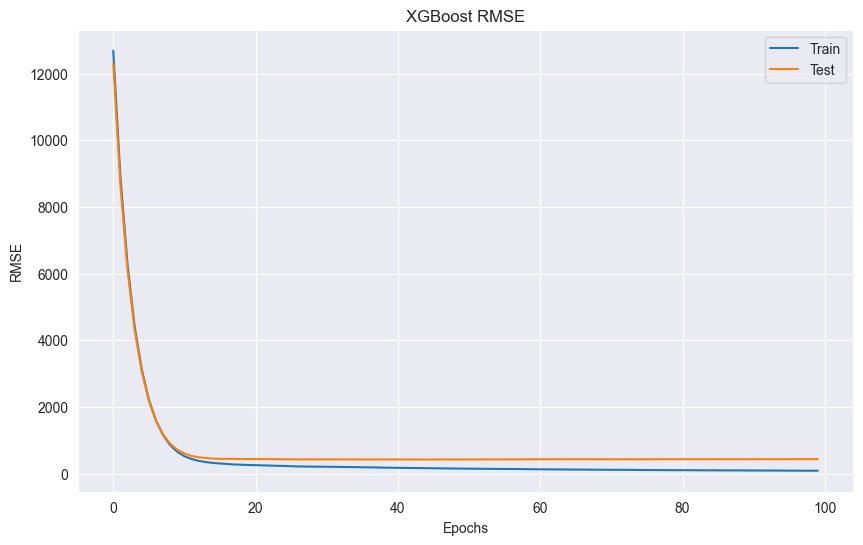

In [73]:
epochs = len(eval_results['validation_0']['rmse'])
x_axis = range(0, epochs)
plt.figure(figsize=(10, 6))
plt.plot(x_axis, eval_results['validation_0']['rmse'], label='Train')
plt.plot(x_axis, eval_results['validation_1']['rmse'], label='Test')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('XGBoost RMSE')
plt.legend()
plt.show()

In [142]:
y_df_test_predict = xgb_regressor.predict(x_df_test_transformed)

In [144]:
eval_df_results = xgb_regressor.evals_result()

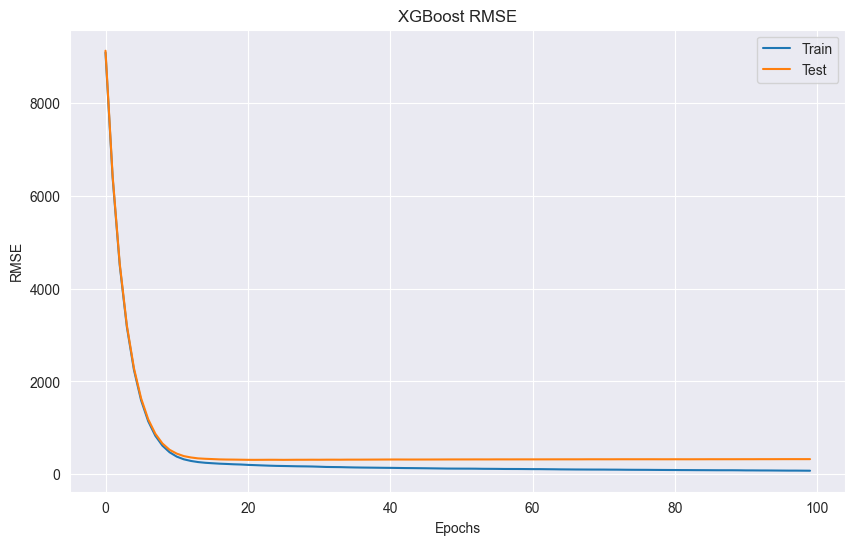

In [145]:
epochs = len(eval_df_results['validation_0']['rmse'])
x_axis = range(0, epochs)
plt.figure(figsize=(10, 6))
plt.plot(x_axis, eval_df_results['validation_0']['rmse'], label='Train')
plt.plot(x_axis, eval_df_results['validation_1']['rmse'], label='Test')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('XGBoost RMSE')
plt.legend()
plt.show()

In [74]:
R2 = r2_score(y_test, Y_test_predict)

In [75]:
R2

0.9993869630093855

In [146]:
R2_df_test = r2_score(y_df_test, y_df_test_predict)

In [147]:
R2_df_test

0.9993719233201782

C:\Users\USER\AppData\Local\Temp\ipykernel_11208\2854523830.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='red', label='Perfect Prediction')


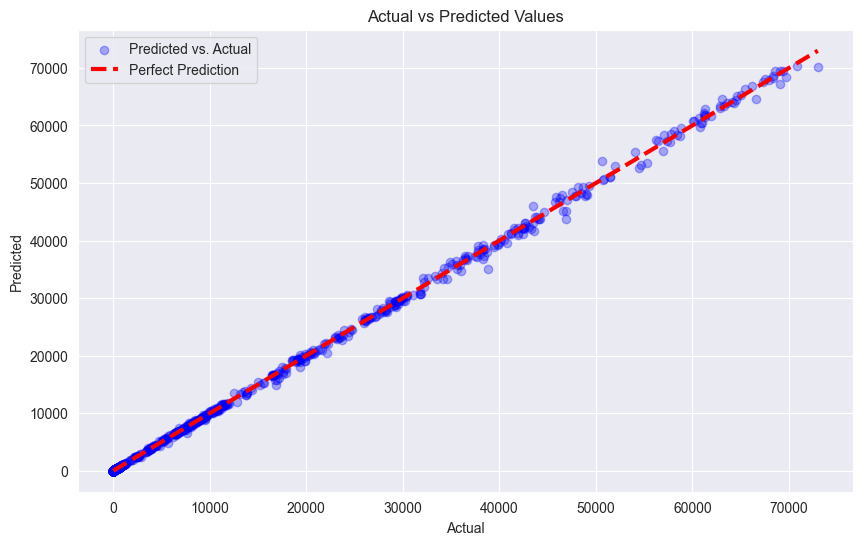

In [76]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, Y_test_predict, alpha=0.3, color='blue', label='Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='red', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_11208\2798798632.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_df_test.min(), y_df_test.max()], [y_df_test.min(), y_df_test.max()], 'k--', lw=3, color='red', label='Perfect Prediction')


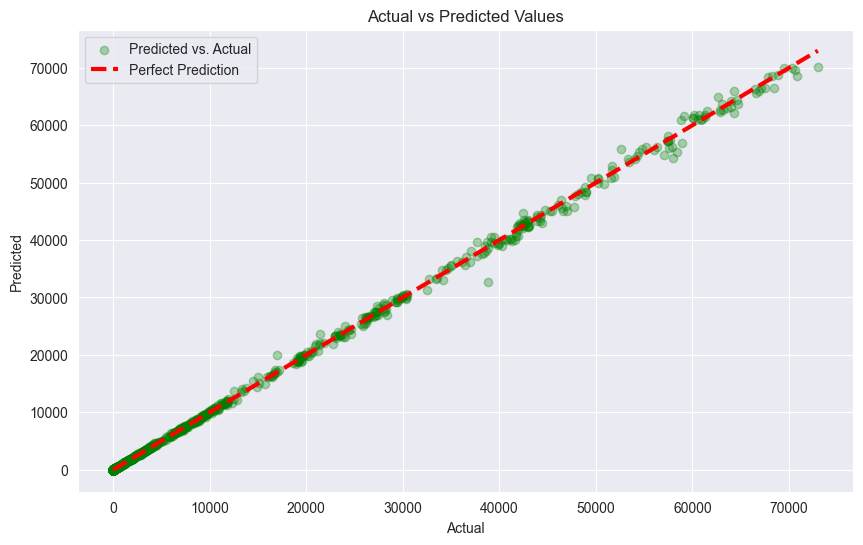

In [150]:
plt.figure(figsize=(10, 6))
plt.scatter(y_df_test, y_df_test_predict, alpha=0.3, color='green', label='Predicted vs. Actual')
plt.plot([y_df_test.min(), y_df_test.max()], [y_df_test.min(), y_df_test.max()], 'k--', lw=3, color='red', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

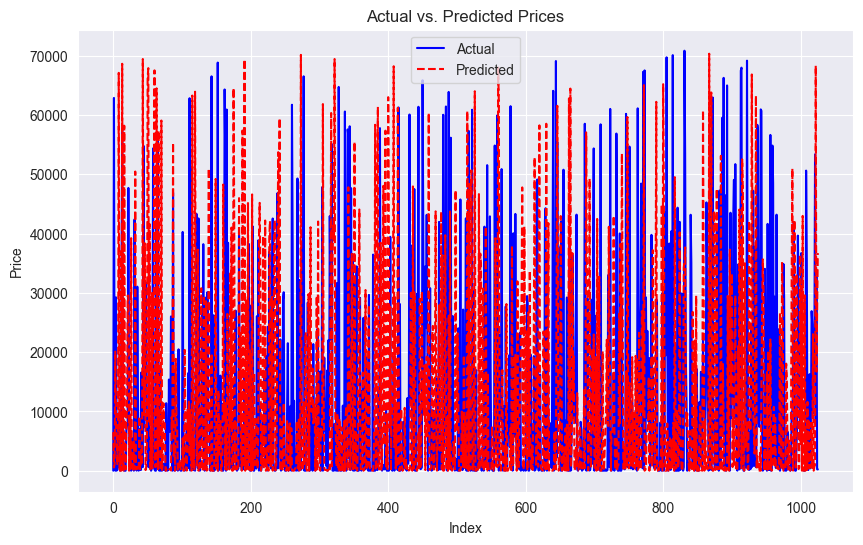

In [152]:
# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(Y_test_predict, label='Predicted', color='red', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.show()

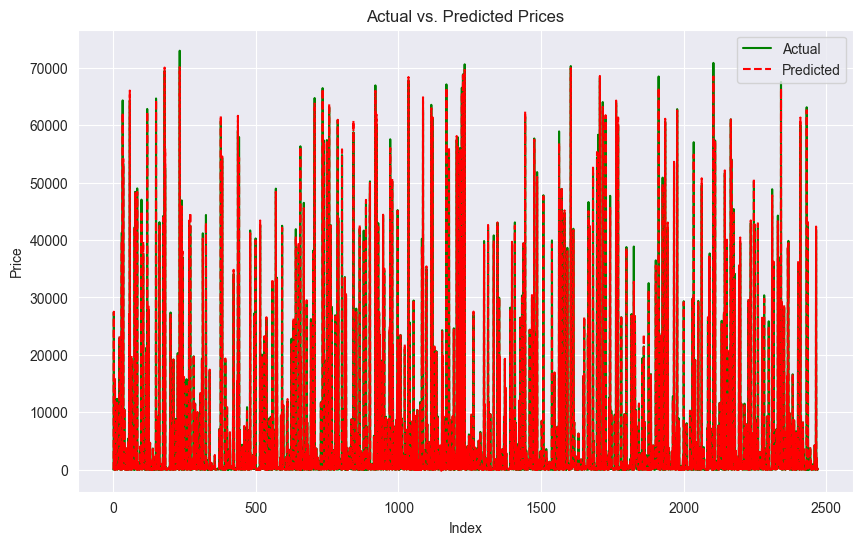

In [153]:
plt.figure(figsize=(10, 6))
plt.plot(y_df_test.values, label='Actual', color='green')
plt.plot(y_df_test_predict, label='Predicted', color='red', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.show()

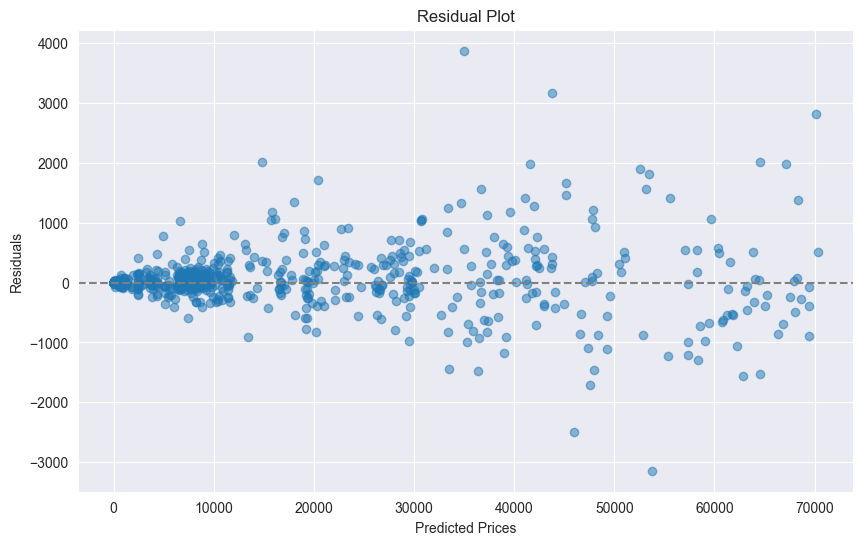

In [78]:
# Calculate residuals
residuals = y_test.values - Y_test_predict

# Plotting Residuals
plt.figure(figsize=(10, 6))
plt.scatter(Y_test_predict, residuals, alpha=0.5)
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


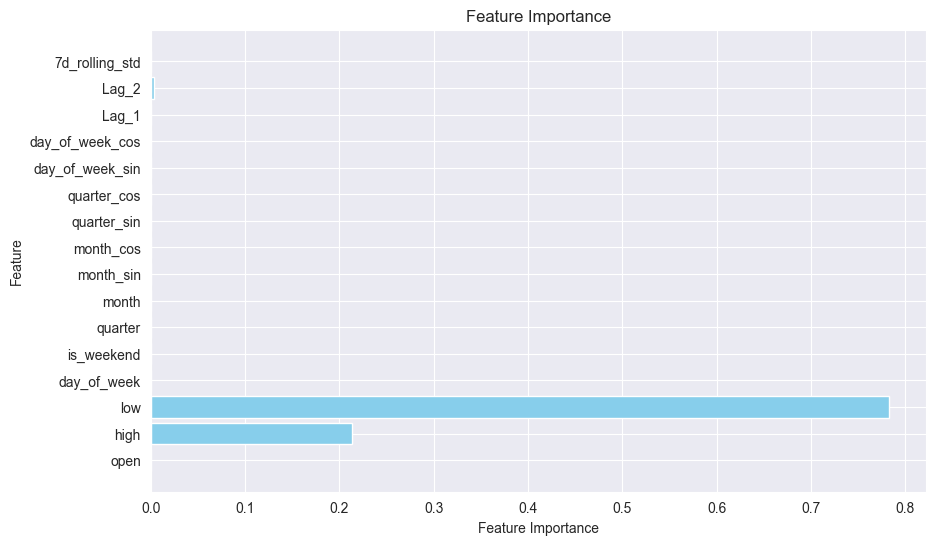

In [79]:
importances = xgb_regressor.feature_importances_

# Plotting Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(columns, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


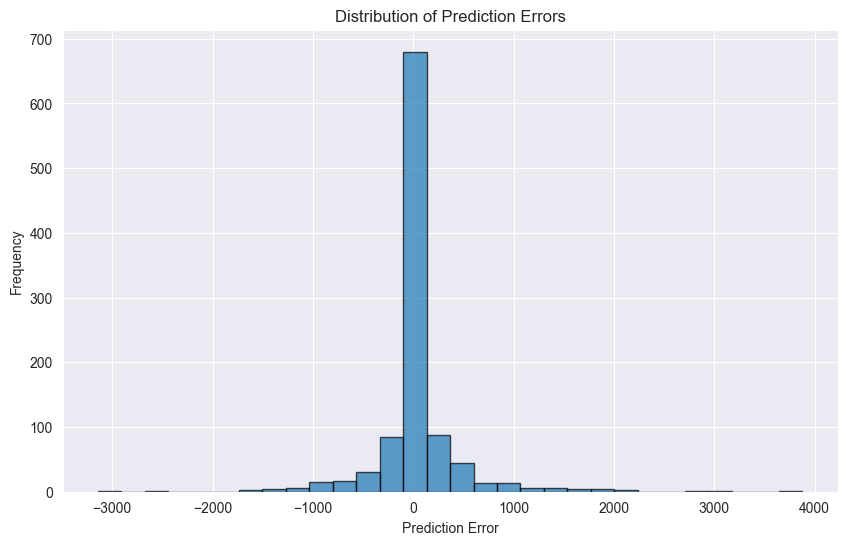

In [80]:
# Plotting Prediction Error Distribution
errors = y_test.values - Y_test_predict

plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.show()


In [81]:
# Calculating Performance Metrics
r2 = r2_score(y_test, Y_test_predict)
mse = mean_squared_error(y_test, Y_test_predict)
rmse = mse ** 0.5

print(f'R² Score: {r2:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

R² Score: 0.9994
Mean Squared Error (MSE): 188493.6871
Root Mean Squared Error (RMSE): 434.1586


In [82]:
y_train_predict = xgb_regressor.predict(x_train_transformed)

In [83]:
R2_train = r2_score(y_train, y_train_predict)

In [84]:
R2_train

0.9999768651561287

In [151]:
y_df_train_predict = xgb_regressor.predict(x_df_train_transformed)
R2_df_train = r2_score(y_df_train, y_df_train_predict)
print(R2_df_train)

0.9999665572352661
